In [1]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from publicMethod import *
time = Timer()

In [2]:
# get train and test data form op
file_name = "data/GSOD_2021/010010-99999-2021.op"
avg_data, min_data, max_data = open_file(file_name)
(train_data, train_label), (test_data, test_label) = generate(int(0.75*len(avg_data)), avg_data)

In [3]:
print(train_data, train_label[0:9])

[[23.4 31.5 35.  ... 27.5 23.6 18.7]
 [31.5 35.  35.4 ... 23.6 18.7 26.9]
 [35.  35.4 27.5 ... 18.7 26.9 31.7]
 ...
 [38.7 38.1 37.1 ... 38.  39.4 40.9]
 [38.1 37.1 36.9 ... 39.4 40.9 40.2]
 [37.1 36.9 38.  ... 40.9 40.2 39.4]] [31.7 32.1 31.9 29.2 29.5 33.5 32.5 32.2 33.9]


In [4]:
# data iter updater
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i + batch_size, num_examples)])
        """print(tf.gather(features, j), tf.gather(labels, j))"""
        yield tf.gather(features, j), tf.gather(labels, j)

In [5]:
# 初始化模型参数
w = tf.Variable(tf.random.normal(shape=(20, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [33]:
# 定义模型
def linreg(X, w, b): #@save
    y_true = list(np.empty(len(X[:, 0])))
    print(X[:, 0])
    for i in range(len(X[0, :])):
        re1 = np.full(w.shape[0],X[:, 0][i]) ** np.arange(w.shape[0])
        re2 = np.multiply(re1, w[0])
        re3 = np.add(re2, np.full(w.shape[0], b))
        y_true[i] = np.sum(re3)
        print(np.array(y_true))
    return np.array(y_true)


In [30]:
# 定义损失函数
def squared_loss(y_hat, y):
    """均方损失。"""
    return (y_hat.T - tf.reshape(y, y_hat.shape))**2 / 2

In [31]:
# 定义优化算法
def sgd(params, grads, lr, batch_size):  #@save
    """小批量随机梯度下降。"""
    for param, grad in zip(params, grads):
        param.assign_sub(lr * grad / batch_size)

In [34]:
lr = 0.03
num_epochs = 30
net = linreg
loss = squared_loss
batch_size = 9
"""for X, y in data_iter(batch_size, train_data, train_label):
    print(X, y)"""
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, train_data, train_label):
        true_y = net(X, w, b)
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # `X`和`y`的小批量损失
        # 计算l关于[`w`, `b`]的梯度
        dw, db = g.gradient(l, [w, b])
        # 使用参数的梯度更新参数
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(train_data, w, b), train_label)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

tf.Tensor([21.6 37.7 33.5 26.5 25.7 30.1 28.5 33.9 33.3], shape=(9,), dtype=float64)
[-2.08450555e+22 -6.75089301e+24 -7.64675898e+25 -1.07298418e+26
 -6.51015290e+23 -2.71468295e+26 -1.07298418e+26 -1.53791408e+25
 -7.64675898e+25]
[-2.08450555e+22 -8.05297209e+26 -7.64675898e+25 -1.07298418e+26
 -6.51015290e+23 -2.71468295e+26 -1.07298418e+26 -1.53791408e+25
 -7.64675898e+25]
[-2.08450555e+22 -8.05297209e+26 -8.56659102e+25 -1.07298418e+26
 -6.51015290e+23 -2.71468295e+26 -1.07298418e+26 -1.53791408e+25
 -7.64675898e+25]
[-2.08450555e+22 -8.05297209e+26 -8.56659102e+25 -1.00501502e+24
 -6.51015290e+23 -2.71468295e+26 -1.07298418e+26 -1.53791408e+25
 -7.64675898e+25]
[-2.08450555e+22 -8.05297209e+26 -8.56659102e+25 -1.00501502e+24
 -5.62031643e+23 -2.71468295e+26 -1.07298418e+26 -1.53791408e+25
 -7.64675898e+25]
[-2.08450555e+22 -8.05297209e+26 -8.56659102e+25 -1.00501502e+24
 -5.62031643e+23 -1.12520636e+25 -1.07298418e+26 -1.53791408e+25
 -7.64675898e+25]
[-2.08450555e+22 -8.0529720

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [5]:
def synthetic_data(w, b, num_examples):  #@save
    """生成 y = Xw + b + 噪声。"""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print(features)
labels

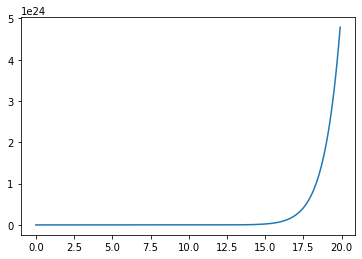

[ 0.56692302 -0.83130397  1.66664026 -0.3447496   1.6054356   1.50728196
  1.88415515  0.61741934  1.6982964  -0.9914116   0.43003648  0.74132462
  0.87247108  1.58116087  0.2192443   1.57454422 -0.57899252  1.91213579
 -0.1724873   1.00821592]


In [35]:
# build regression model
# linear_regression
params = np.array([random.randint(-1.0, 1.0)+random.random() for i in range(20)])
x_true = np.arange(0, 20, .1)
y_true = np.empty(x_true.shape)
for i in range(len(x_true)):
    re1 = (np.full((20), x_true[i]) ** np.arange(len(params)))
    re2 = tf.multiply(params, re1)
    y_true[i] = np.sum(re2)
plt.plot(x_true, y_true)
plt.show()
print(params)

In [2]:
import PYEmd

ModuleNotFoundError: No module named 'PYEmd'